<h3> Breast Cancer </h3>

1. Import libraries 

<p style="font-size: 12px"> The Breast Cancer dataset is a popular machine learning dataset that provides information about breast cancer tumors. It is commonly used for classification tasks.The dataset contains measurements from digitized images of fine needle aspirates (FNA) of breast mass. It includes features computed from these images, such as mean radius, mean texture, mean perimeter, mean area, etc. These features are used to classify the tumors as either malignant (cancerous) or benign (non-cancerous). </p>

In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.features import Rank2D
from yellowbrick.target import FeatureCorrelation
import  matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import plotly.express as px
import numpy as np 
import seaborn as sns 


2. Download Database 

In [19]:
database = load_breast_cancer()
dir(database)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [20]:
target_names = database.target_names
feature_names = list(database.feature_names)

feature_names.append("cancer_type")
X = database.data
Y = database.target

Yn = np.array([target_names[i] for i in Y])

total_data = np.concatenate((X, Yn.reshape(569,1)) , axis = 1)
df = pd.DataFrame(total_data, columns= feature_names)

df.describe()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer_type
count,569,569,569,569,569,569,569,569,569,569,...,569,569,569,569,569,569,569,569,569,569
unique,456,479,522,539,474,537,537,542,432,499,...,511,514,544,411,529,539,492,500,535,2
top,12.34,15.7,87.76,512.2,0.1007,0.1206,0.0,0.0,0.1601,0.06113,...,17.7,101.7,826.4,0.1312,0.3416,0.0,0.0,0.3109,0.07427,benign
freq,4,3,3,3,5,3,13,13,4,3,...,3,3,2,4,3,13,13,3,3,357


3 . Make PCA from Dataset 

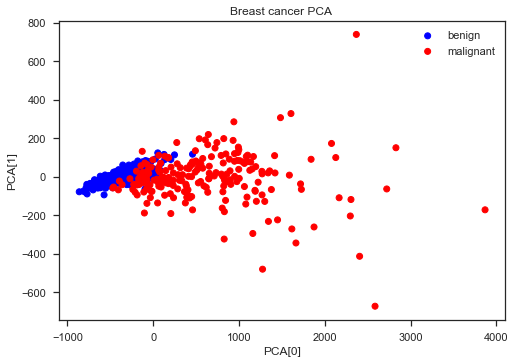

In [21]:
pca = PCA(n_components= 2).fit_transform(X)

pca_g1 = np.array([[pca[i][0] , pca[i][1]] for i in range(pca.shape[0]) if Yn[i] == 'benign'])
pca_g2 = np.array([[pca[i][0] , pca[i][1]] for i in range(pca.shape[0]) if Yn[i] == 'malignant'])



label1 = ["blue" for i in range(pca.shape[0]) if Yn[i] == 'benign']
label2 = ["red" for i in range(pca.shape[0]) if Yn[i] == 'malignant']


fig, axes = plt.subplots()
scatter = axes.scatter(pca_g1[:,0], pca_g1[:,1], c =label1, label= "benign")
scatter = axes.scatter(pca_g2[:,0], pca_g2[:,1], c=label2 , label='malignant' )

plt.legend()
plt.title("Breast cancer PCA ")
plt.xlabel("PCA[0]")
plt.ylabel("PCA[1]")
plt.show()

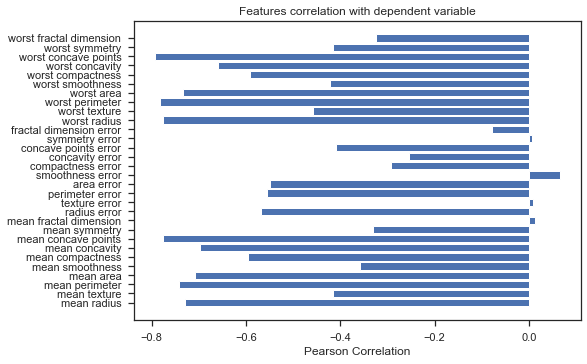

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [29]:
display = FeatureCorrelation(labels = database.feature_names)
display.fit(X, Y)
display.show()

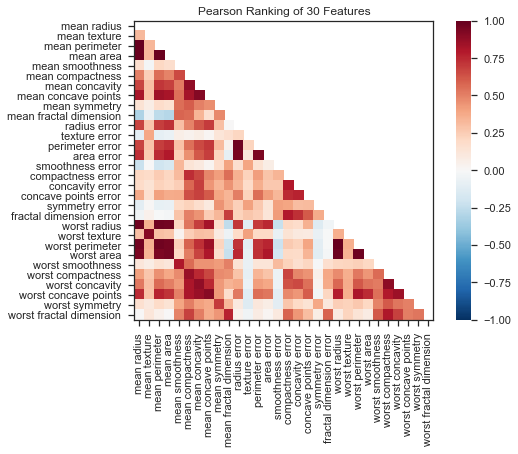

<AxesSubplot:title={'center':'Pearson Ranking of 30 Features'}>

In [41]:
display= Rank2D(algorithm='pearson', features = database.feature_names)

display.fit(X, Y)           
display.transform(X)        
display.show()              

4. Divide train test data

In [22]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size= 0.33)


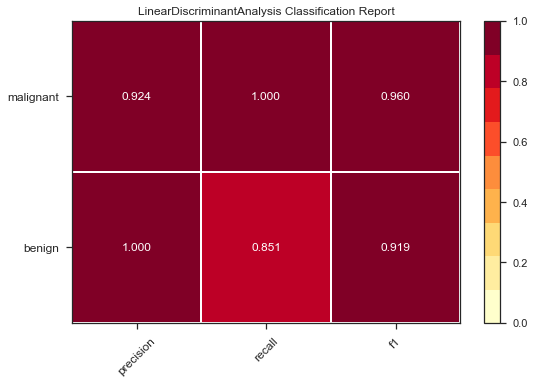

<AxesSubplot:title={'center':'LinearDiscriminantAnalysis Classification Report'}>

In [23]:
lda = LinearDiscriminantAnalysis()
display = ClassificationReport(lda, classes =list(set(Yn)), suport= True)
display.fit(Xtrain, Ytrain)
display.score(Xtest, Ytest)
display.show()

$$
precision = \frac{tp}{(tp + fp)}
$$

precision is the number of correct classification in all classified data

$$
recall = \frac{tp}{(tp + fn)}
$$

recall is the number of correct classification in all class

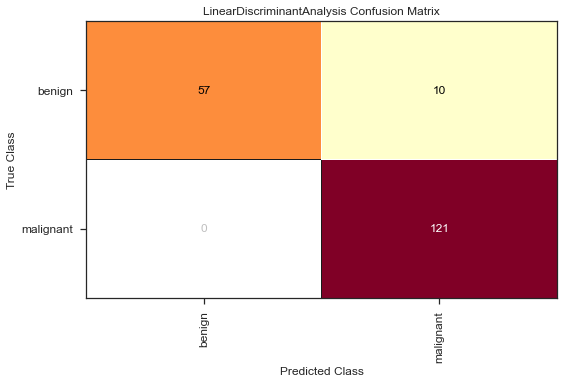

<AxesSubplot:title={'center':'LinearDiscriminantAnalysis Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [24]:
display = ConfusionMatrix(lda, classes =list(set(Yn)))
display.fit(Xtrain, Ytrain)
display.score(Xtest, Ytest)
display.show()